In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_pickle('../TESTS/dataframe_POP-Kraus_vs_DMD_trn4-tst20_polymin_fids_2023-Sep-17_at_16-53.h5.pkl')
df.fillna(1)

,Gamma,State,F_POP_vs_sb,F_POP_vs_LME,F_DMD_vs_sb,F_DMD_vs_LME,F_DMD_Kraus_vs_sb,F_DMD_Kraus_vs_LME
0,0.079477,State_D1,1.000000,1.0,1.000000,1.0,1.000000,1.0
1,0.079477,State_D1,1.000000,1.0,1.000000,1.0,0.999997,1.0
2,0.079477,State_D1,1.000000,1.0,1.000000,1.0,0.999988,1.0
3,0.079477,State_D1,1.000000,1.0,0.999999,1.0,0.999973,1.0
4,0.079477,State_D1,0.999996,1.0,0.999997,1.0,0.999943,1.0
...,...,...,...,...,...,...,...,...
745,79.477,State_D9,0.999995,1.0,0.999993,1.0,0.988294,1.0
746,79.477,State_D9,0.999995,1.0,0.999993,1.0,0.988294,1.0
747,79.477,State_D9,0.999994,1.0,0.999993,1.0,0.988294,1.0
748,79.477,State_D9,0.999994,1.0,0.999993,1.0,0.988293,1.0


In [3]:
df.columns

Index(['Gamma', 'State', 'F_POP_vs_sb', 'F_POP_vs_LME', 'F_DMD_vs_sb',
       'F_DMD_vs_LME', 'F_DMD_Kraus_vs_sb', 'F_DMD_Kraus_vs_LME'],
      dtype='object')

In [4]:
min(df.F_DMD_Kraus_vs_sb)

0.895049434198939

In [5]:
def add_log_infidelities(df):

    df['Infidelity_POP_vs_sb'] = 1 - df.F_POP_vs_sb
    df['Infidelity_POP_vs_LME'] = 1 - df.F_POP_vs_LME
    df['Infidelity_DMD_vs_sb'] = 1 - df.F_DMD_vs_sb
    df['Infidelity_DMD_vs_LME'] = 1 - df.F_DMD_vs_LME
    df['Infidelity_DMD_Kraus_vs_sb'] = 1 - df.F_DMD_Kraus_vs_sb
    df['Infidelity_DMD_Kraus_vs_LME'] = 1 - df.F_DMD_Kraus_vs_LME


    df['LogInF_POP_vs_sb'] = np.log10(np.abs(df['Infidelity_POP_vs_sb']))
    df['LogInF_POP_vs_LME'] = np.log10(np.abs(df['Infidelity_POP_vs_LME']))
    df['LogInF_DMD_vs_sb'] = np.log10(np.abs(df['Infidelity_DMD_vs_sb']))
    df['LogInF_DMD_vs_LME'] = np.log10(np.abs(df['Infidelity_DMD_vs_LME']))
    df['LogInF_DMD_Kraus_vs_sb'] = np.log10(np.abs(df['Infidelity_DMD_Kraus_vs_sb']))
    df['LogInF_DMD_Kraus_vs_LME'] = np.log10(np.abs(df['Infidelity_DMD_Kraus_vs_LME']))
    
    cutoff = -15

    df.loc[df['LogInF_POP_vs_sb'] < cutoff, 'LogInF_POP_vs_sb'] = cutoff
    df.loc[df['LogInF_POP_vs_LME'] < cutoff, 'LogInF_POP_vs_LME'] = cutoff
    df.loc[df['LogInF_DMD_vs_sb'] < cutoff,  'LogInF_DMD_vs_sb'] = cutoff
    df.loc[df['LogInF_DMD_vs_LME'] < cutoff, 'LogInF_DMD_vs_LME'] = cutoff
    df.loc[df['LogInF_DMD_Kraus_vs_sb'] < cutoff, 'LogInF_DMD_Kraus_vs_sb'] = cutoff
    df.loc[df['LogInF_DMD_Kraus_vs_LME'] < cutoff, 'LogInF_DMD_Kraus_vs_LME'] = cutoff

    df['Gamma'] = df['Gamma'].astype(float)
    
    return df  

In [6]:
df = add_log_infidelities(df)

df.columns

/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: R

Index(['Gamma', 'State', 'F_POP_vs_sb', 'F_POP_vs_LME', 'F_DMD_vs_sb',
       'F_DMD_vs_LME', 'F_DMD_Kraus_vs_sb', 'F_DMD_Kraus_vs_LME',
       'Infidelity_POP_vs_sb', 'Infidelity_POP_vs_LME', 'Infidelity_DMD_vs_sb',
       'Infidelity_DMD_vs_LME', 'Infidelity_DMD_Kraus_vs_sb',
       'Infidelity_DMD_Kraus_vs_LME', 'LogInF_POP_vs_sb', 'LogInF_POP_vs_LME',
       'LogInF_DMD_vs_sb', 'LogInF_DMD_vs_LME', 'LogInF_DMD_Kraus_vs_sb',
       'LogInF_DMD_Kraus_vs_LME'],
      dtype='object')

/tmp/ipykernel_14108/3978176966.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


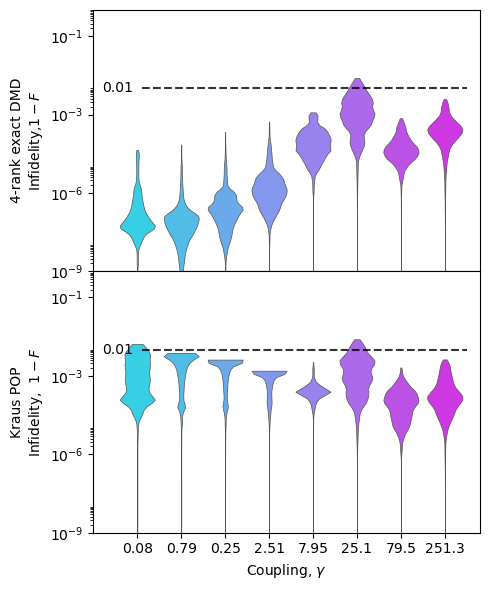

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(5,6), sharex = True)

sns.violinplot(ax=ax[0], data=df, x="Gamma", y='LogInF_DMD_vs_sb', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -9
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
#ytick_labels = [r'$10^{-15}$', r'$10^{-12}$',
ytick_labels = [r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

#ytick_labels = [r'$10^{-15}$', r'$10^{-14}$', r'$10^{-13}$', r'$10^{-12}$', r'$10^{-11}$', r'$10^{-10}$',
#r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$',
#r'$10^{-2}$', r'$10^{-1}$', r'$10^0$']

ax[0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0].set_ylim(ymin, ymax)

ax[0].set_ylabel('4-rank exact DMD\n'+r'Infidelity,$1-F$')
ax[0].set_xlabel('')

ax[0].hlines(y=np.log10(.01), xmin=0.1, xmax=7.5, colors='black', linestyles='--', alpha=0.8)
ax[0].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')


sns.violinplot(ax=ax[1], data=df, x="Gamma", y= 'LogInF_POP_vs_sb', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1].set_ylim(ymin, ymax)
ax[1].set_xlim(-1, 7.8)

ax[1].set_ylabel( 'Kraus POP\n'+r'Infidelity,  $1-F$')
ax[1].set_xlabel(r'Coupling, $\gamma$')

xtick_range = np.arange(0, 8)
xtick_labels = [ '0.08', '0.79', '0.25', '2.51', '7.95', '25.1', '79.5', '251.3']

ax[1].xaxis.set_ticks(xtick_range, xtick_labels)

ax[1].hlines(y=np.log10(.01), xmin=0.1, xmax=7.5, colors='black', linestyles='--', alpha=0.8)
ax[1].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')

fig.tight_layout()
fig.subplots_adjust(hspace = .0)

fig.savefig("2KrausPOPvsDMD_SB_4-20_violin.pdf")

fig.show()


In [30]:
#fig.savefig("POPvsDMD_violin.pdf")

/tmp/ipykernel_14108/516703365.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


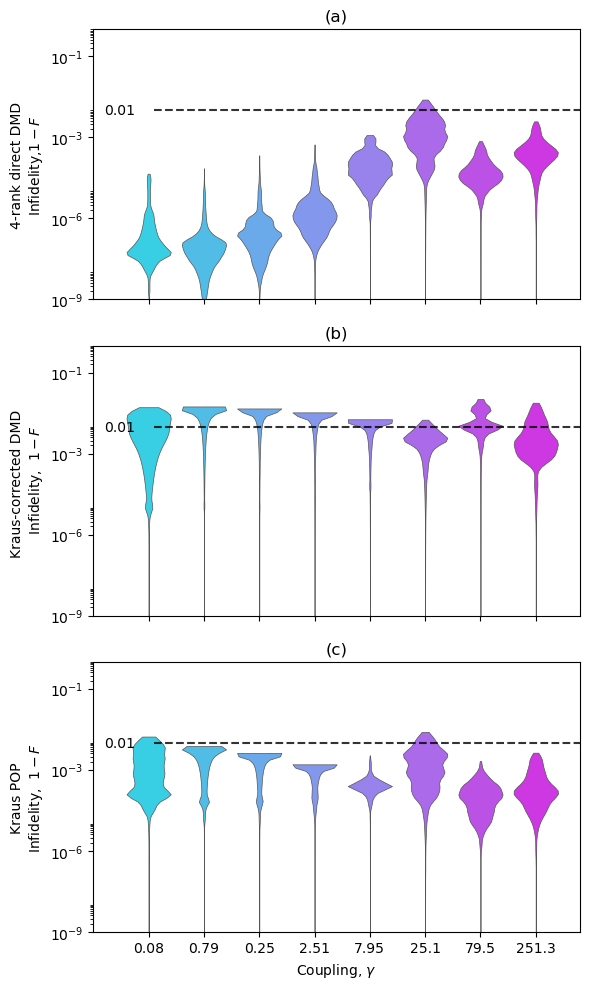

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(6,10), sharex = True)

sns.violinplot(ax=ax[0], data=df, x="Gamma", y='LogInF_DMD_vs_sb', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -9
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
#ytick_labels = [r'$10^{-15}$', r'$10^{-12}$',
ytick_labels = [r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

#ytick_labels = [r'$10^{-15}$', r'$10^{-14}$', r'$10^{-13}$', r'$10^{-12}$', r'$10^{-11}$', r'$10^{-10}$',
#r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$',
#r'$10^{-2}$', r'$10^{-1}$', r'$10^0$']

ax[0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0].set_ylim(ymin, ymax)

ax[0].set_ylabel('4-rank direct DMD\n'+r'Infidelity,$1-F$')
ax[0].set_xlabel('')
ax[0].set_title("(a)")

ax[0].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[0].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')


sns.violinplot(ax=ax[1], data=df, x="Gamma", y= 'LogInF_DMD_Kraus_vs_sb', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1].set_ylim(ymin, ymax)
ax[1].set_xlim(-1, 7.8)

ax[1].set_ylabel('Kraus-corrected DMD \n'+r' Infidelity,  $1-F$')
ax[1].set_xlabel('')
ax[1].set_title("(b)")

ax[1].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')


sns.violinplot(ax=ax[2], data=df, x="Gamma", y= 'LogInF_POP_vs_sb', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[2].yaxis.set_ticks(ytick_range, ytick_labels)
ax[2].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[2].set_ylim(ymin, ymax)
ax[2].set_xlim(-1, 7.8)

ax[2].set_ylabel( 'Kraus POP\n'+r'Infidelity,  $1-F$')
ax[2].set_xlabel(r'Coupling, $\gamma$')

xtick_range = np.arange(0, 8)
xtick_labels = [ '0.08', '0.79', '0.25', '2.51', '7.95', '25.1', '79.5', '251.3']

ax[2].xaxis.set_ticks(xtick_range, xtick_labels)

ax[2].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[2].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')

ax[2].set_title("(c)")

fig.tight_layout()
#fig.subplots_adjust(hspace = .0)

fig.savefig("3KrausPOPvsDMD_SB_4-20_violin.pdf")

fig.show()